In [147]:
import warnings
import scipy
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
import os 

In [152]:
df_complete_database = pd.read_csv('hormone production rates with labels 180623_for python.csv')
df_complete_database.head(100)

,hormone,volume (ml),second estimation for volume (ml),concentration (pg/ml),hormone concentration (pg/ml) in log 10 scale,second estimation of hormone concentration (mg/ml),amount of hormone = pg/ml*V,second estimation of amount of hormone in plasma= mg/ml * V (ml) = mg,second estimation of amount of hormone in plasma= mg/ml * V (ml) *10^9 = pg,second estimation of pro. rate of hormone mass= pg/ml*V(ml) / T (half life; days) / number of secreting cells,...,second estimation of mass of target organ (gr.),mass of target organ w/t ref.,number of cells in targert organ,second estimation of num of cells in target organ,number of cells in target organ in log 10 scale,second estimation of number of cells in target organ in log 10 scale,forcing slope to be a=1 : log y- logx,type,exclude_from_fit,Unnamed: 52
0,CRH,1.0,1.0,??,1.000000,NaN,1.000000e+01,NaN,NaN,NaN,...,0.06,0.1,100000000,1.000000e+07,8.00000,7.000000,3.000000,1.0,0.0,NaN
1,ACTH,5000.0,5000.0,60,1.880814,6.000000e-08,3.800000e+05,0.0003,3.000000e+05,2.160000,...,5,5,5000000000,5.000000e+09,9.69897,9.698970,2.698970,1.0,0.0,NaN
2,cortisol,35000.0,50000.0,200000,5.342423,2.000000e-04,7.700000e+09,10.0000,1.000000e+10,54.545455,...,NaN,56500,3.72*10^13 (42),5.000000e+12,NaN,12.698970,3.096910,1.0,0.0,NaN
3,GH,5000.0,5000.0,10000,3.903090,1.000000e-05,4.000000e+07,0.0500,5.000000e+07,132.352941,...,NaN,1500,240*10^9,2.523000e+11,NaN,11.401917,3.799857,1.0,0.0,NaN
4,TRH,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.02,20000000,4.000000e+06,7.30103,6.602060,2.602060,1.0,0.0,7.30103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df_hormones_relevant = df_complete_database[0:24]
df_hormones_relevant

,hormone,volume (ml),second estimation for volume (ml),concentration (pg/ml),hormone concentration (pg/ml) in log 10 scale,second estimation of hormone concentration (mg/ml),amount of hormone = pg/ml*V,second estimation of amount of hormone in plasma= mg/ml * V (ml) = mg,second estimation of amount of hormone in plasma= mg/ml * V (ml) *10^9 = pg,second estimation of pro. rate of hormone mass= pg/ml*V(ml) / T (half life; days) / number of secreting cells,...,second estimation of mass of target organ (gr.),mass of target organ w/t ref.,number of cells in targert organ,second estimation of num of cells in target organ,number of cells in target organ in log 10 scale,second estimation of number of cells in target organ in log 10 scale,forcing slope to be a=1 : log y- logx,type,exclude_from_fit,Unnamed: 52
0,CRH,1.0,1.0,??,1.000000,NaN,1.000000e+01,NaN,NaN,NaN,...,0.06,0.1,100000000,1.000000e+07,8.000000,7.000000,3.000000,1.0,0.0,NaN
1,ACTH,5000.0,5000.0,60,1.880814,6.000000e-08,3.800000e+05,0.00030,3.000000e+05,2.160000,...,5,5,5000000000,5.000000e+09,9.698970,9.698970,2.698970,1.0,0.0,NaN
2,cortisol,35000.0,50000.0,200000,5.342423,2.000000e-04,7.700000e+09,10.00000,1.000000e+10,54.545455,...,NaN,56500,3.72*10^13 (42),5.000000e+12,NaN,12.698970,3.096910,1.0,0.0,NaN
3,GH,5000.0,5000.0,10000,3.903090,1.000000e-05,4.000000e+07,0.05000,5.000000e+07,132.352941,...,NaN,1500,240*10^9,2.523000e+11,NaN,11.401917,3.799857,1.0,0.0,NaN
4,TRH,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.02,20000000,4.000000e+06,7.301030,6.602060,2.602060,1.0,0.0,7.30103
5,TSH,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,2.5,2500000000,2.500000e+09,9.397940,9.397940,2.795880,1.0,0.0,NaN
6,T4,35000.0,5000.0,115000,5.060698,1.120000e-04,4.025000e+09,0.56000,5.600000e+08,0.032000,...,56500,56500,3.72*10^13 (42),5.000000e+12,NaN,12.698970,3.301030,1.0,0.0,NaN
7,GnRH,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.02,20000000,4.000000e+06,7.301030,6.602060,3.359022,1.0,0.0,NaN
8,LH female,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,3.000000e+09,NaN,9.477121,2.875061,NaN,0.0,NaN
9,LH male,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,6,6000000000,1.000000e+09,9.778151,9.000000,2.397940,1.0,0.0,NaN


In [154]:
df_hormones_for_plot = df_hormones_relevant[['hormone' , 'second estimation for num of sec cells in log 10 scale' , 'second estimation of number of cells in target organ in log 10 scale']]

In [155]:
df_hormones_for_plot

,hormone,second estimation for num of sec cells in log 10 scale,second estimation of number of cells in target organ in log 10 scale
0,CRH,4.000000,7.000000
1,ACTH,7.000000,9.698970
2,cortisol,9.602060,12.698970
3,GH,7.602060,11.401917
4,TRH,4.000000,6.602060
5,TSH,6.602060,9.397940
6,T4,9.397940,12.698970
7,GnRH,3.243038,6.602060
8,LH female,6.602060,9.477121
9,LH male,6.602060,9.000000


In [156]:
x1 = df_hormones_for_plot['second estimation for num of sec cells in log 10 scale']
y1 = df_hormones_for_plot['second estimation of number of cells in target organ in log 10 scale']
z1 = df_hormones_for_plot['hormone']

In [157]:
y1 = y1.astype(np.float64)

In [158]:
slope1, intercept1, r_value1, p_value1, std_err1= stats.linregress(x1, y1)
print("slope: %f    intercept: %f" % (slope1, intercept1))

slope: 0.948626    intercept: 3.307995


In [159]:
stats.linregress(x1, y1)

LinregressResult(slope=0.9486258648858598, intercept=3.3079946112281196, rvalue=0.9416394787262649, pvalue=7.0273357171269545e-12, stderr=0.07230075645954354, intercept_stderr=0.556465787125043)

In [160]:
print("R-squared: %f" % r_value1**2)

R-squared: 0.886685


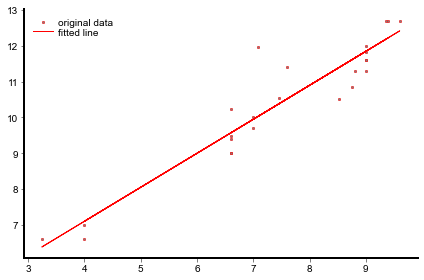

In [161]:
plt.plot(x1, y1, 'o', label='original data',color='red')
plt.plot(x1, intercept1 + slope1*x1, 'r', label='fitted line')
plt.legend()
plt.show()

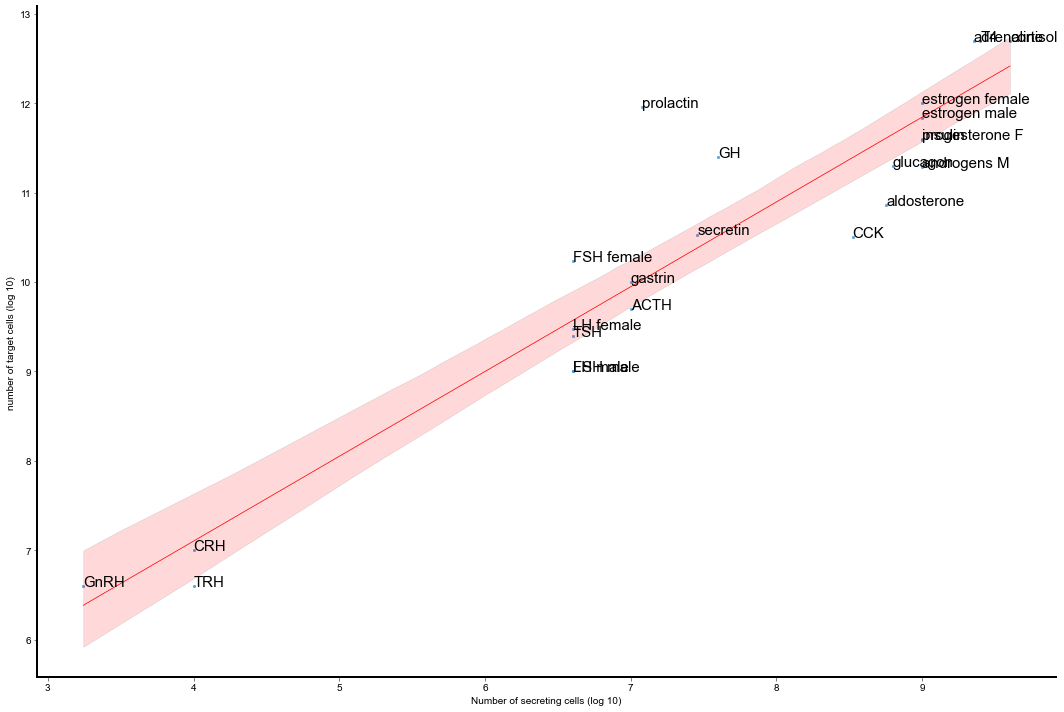

In [162]:
ax1 = sns.regplot(x=x1, y=y1, line_kws={"color": "red"})
ax1.figure.set_size_inches(15,10)
ax1.set(xlabel="Number of secreting cells (log 10)", ylabel="number of target cells (log 10)")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i,point in a.iterrows():
        
        ax.text(point['x'], point['y'], str(point['val']), size=15)
        
label_point(x1, y1, z1, ax1)

In [189]:
#xy=np.array((x1,y1)).T
numreps=1000
indices=np.random.choice(np.arange(len(x1)), size=(len(x1),numreps), replace=True)
boots=np.array([(np.random.normal(x1[i],np.log10(2)/2),np.random.normal(y1[i],np.log10(2)/2)) for i in indices])

In [190]:
slopes= np.zeros(boots.shape[2])
intercepts= np.zeros(boots.shape[2])
for i in range(boots.shape[2]):
    linfit= scipy.stats.linregress(boots[:,0,i], boots[:,1,i])
    slopes[i]= linfit.slope
    intercepts[i]= linfit.intercept

In [191]:
(np.mean(slopes),np.quantile(slopes,(.025,0.975)))

(0.9426477254763885, array([0.8240587 , 1.04208611]))

In [178]:
(np.mean(intercepts),np.quantile(intercepts,(.025,0.975)))

(3.3897932567456164, array([2.59451383, 4.36040594]))

In [182]:
(10**np.mean(intercepts),10**np.quantile(intercepts,(.025,0.975)))

(2453.540644488276, array([  393.10976086, 22930.09965747]))

In [185]:
#this is the correct and final plot for figure 2 of the paper:

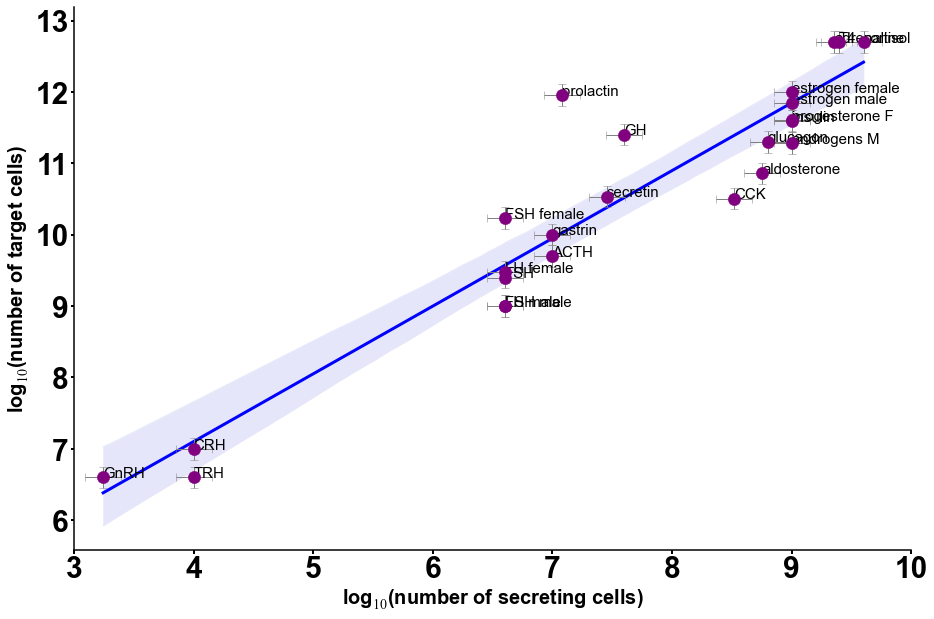

In [192]:
#this is the correct and final code for figure 2 of the paper:
sns.reset_orig()
sns.despine()
#sns.set(font_scale=1.5)
plt.style.use('/Users/moriyaraz/Downloads/mplfigures.style')



ax1 = sns.regplot(x=x1, y=y1, line_kws={"color": "blue", 'linewidth':3},
                  scatter_kws={"color":"purple", "s":150, "clip_on":False, "alpha":1, "zorder":10}, ci=None)

plt.errorbar(x1.values,y1.values,xerr=np.log10(2)/2,yerr=np.log10(2)/2,fmt="none",ecolor="grey",elinewidth=1,
             capsize=4,zorder=3)


ax1.figure.set_size_inches(15,10)
#ax1.set(xlabel="log$_{10}$(number of secreting cells)", ylabel="log$_{10}$(number of target cells)")
ax1.spines['bottom'].set_linewidth(1.5) 
ax1.spines['left'].set_linewidth(1.5) 
plt.xlabel("log$_{10}$(number of secreting cells)",fontsize=20,fontweight='bold')
plt.ylabel("log$_{10}$(number of target cells)",fontsize=20,fontweight='bold')

#ax.spines['left'].set_visible(True)

#def label_point(x, y, ax):
    #a = pd.concat({'x': x, 'y': y}, axis=1)
        
#label_point(x1, y1, ax1)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i,point in a.iterrows():
        
        ax.text(point['x'], point['y'], str(point['val']), size=15)
        
label_point(x1, y1, z1, ax1)

#plt.gca().set_aspect('equal', adjustable='box')
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.tick_params(width=2)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.xlim(3,10)

# Define x-values
xs = np.arange(3.243038, 9.602060, 0.001)

# Calculate y-values for each x-value using bootstrapped linear fits
ys = np.array([slopes[i] * xs + intercepts[i] for i in range(len(slopes))])

# Calculate 0.025 and 0.975 quantiles for each x-value
y025 = np.quantile(ys, 0.025, axis=0)
y975 = np.quantile(ys, 0.975, axis=0)

# Plot
plt.plot(xs, y025, color='lavender')
plt.plot(xs, y975, color='lavender')
plt.fill_between(xs,y025,y975, color='lavender')
plt.savefig("/Users/moriyaraz/Desktop/log scale graph.svg")
plt.show()





In [193]:
#this is the correct and final code for figure 3 in the paper:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data
x = x1
y = y1

# Define the range of x-values for extrapolation
extrapolation_x = np.arange(9.61, 12)  # Adjust as needed

# Fit a linear regression model using statsmodels
X = sm.add_constant(x)  # Add a constant term (intercept)
model = sm.OLS(y, X).fit()

# Enlarge the entire plot by specifying figure size
plt.figure(figsize=(15, 10))  # Width: 10 inches, Height: 6 inches

# Additional data points
additional_x = [11.30 , 10.71 , 10.71]
additional_y = [12.69 , 7.30 , 11.53]
additional_labels = ['IGF-1', 'leptin', 'adiponectin']  # Labels for the additional points

# Calculate the predicted values for the extrapolation
extrapolation_X = sm.add_constant(extrapolation_x)
extrapolation_y = model.predict(extrapolation_X)

#calculate error bars:
plt.errorbar(x1.values,y1.values,xerr=np.log10(2)/2,yerr=np.log10(2)/2,fmt="none",ecolor="black",elinewidth=1,
             capsize=4,zorder=2)

plt.errorbar(additional_x,additional_y,xerr=np.log10(2)/2,yerr=np.log10(2)/2,fmt="none",ecolor="black",elinewidth=1,
             capsize=4,zorder=2)

# Calculate the confidence intervals for the extrapolated line
#confidence_intervals = model.get_prediction(extrapolation_X).conf_int()

# Create a scatterplot of the observed data
sns.scatterplot(x=x, y=y, color='grey',s=150,marker='o',zorder=2)

# Annotate data points with labels from the 'hormones' column in the DataFrame
for i, label in enumerate(z1):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=15, fontname='Arial')
    
# Annotate the additional points with labels
for i, label in enumerate(additional_labels):
    plt.annotate(label, (additional_x[i], additional_y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=15, fontname='Arial')

# Plot the regression line for observed data
sns.lineplot(x=x, y=model.predict(X), color='blue')

#calculating the linear fit for the bootstrapping:
# Define x-values
xs = np.arange(3.243038, 11.6, 0.001)

# Calculate y-values for each x-value using bootstrapped linear fits
ys = np.array([slopes[i] * xs + intercepts[i] for i in range(len(slopes))])

# Calculate 0.025 and 0.975 quantiles for each x-value
y025 = np.quantile(ys, 0.025, axis=0)
y975 = np.quantile(ys, 0.975, axis=0)

# Plot
#plt.plot(xs, y025, label='0.025 Quantile', color='lavender')
#plt.plot(xs, y975, label='0.975 Quantile', color='lavender')
#plt.fill_between(xs,y025,y975, color='lavender')

# Plot
plt.plot(xs, y025, color='lavender',zorder=0)
plt.plot(xs, y975, color='lavender',zorder=0)
plt.fill_between(xs,y025,y975, color='lavender',zorder=0)


#calculate confidence interval
#predictions = model.get_prediction(X)
#ci = predictions.conf_int(obs=False, alpha=0.05)


#plot confidence interval
#plt.fill_between(x1, ci[:, 0], ci[:, 1], color='blue', alpha=0.05)


# Plot the extrapolated line
sns.lineplot(x=extrapolation_x, y=extrapolation_y, color='red')

# Plot the confidence intervals for the extrapolated line
#plt.fill_between(extrapolation_x, confidence_intervals[:, 0], confidence_intervals[:, 1], color='red', alpha=0.05, label='Confidence Intervals')

# Plot the additional data points
plt.scatter(additional_x, additional_y, label='Additional Points', color='red', marker='o',s=150, zorder=2)

# Add a horizontal line at y=***
dash_pattern = [10, 5]
plt.axhline(y=12.698970, color='black', dashes=dash_pattern, linewidth=1)

# Customize the appearance of the plot (optional)
#plt.title("Linear Regression with Extrapolation and Confidence Intervals")
plt.xlabel("log$_{10}$(number of secreting cells)",fontsize=30,fontweight='bold')
plt.ylabel("log$_{10}$(number of target cells)",fontsize=30,fontweight='bold')

# Remove the box and set the background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('none')

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.tick_params(width=2)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.xlim(3,12)

plt.savefig("/Users/moriyaraz/Desktop/figure 2 divided paper_190923.svg")
# Show the plot
#plt.legend()
#plt.show()
